In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
os.chdir = ('/Users/zhouyu/Google Drive/python4work/')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Visual Grating Stimulus Display

In [4]:
import scipy.io
test = scipy.io.loadmat('NN_Model/NN_Train.mat')

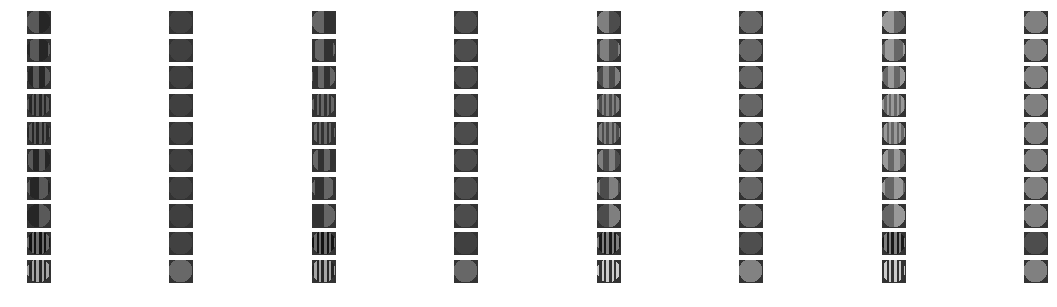

In [5]:
Train_rawimg = test['Train_img_set']
Train_target = test['Train_target']
# visualize some samples from the training set:
import matplotlib.pyplot as plt
pos = 0
for img in Train_rawimg :
    pos+=1
    plt.subplot(10,8,pos)
    plt.imshow((img*255).astype('uint8'),cmap = 'gray',vmin = 0, vmax = 255)
    plt.axis('off')
plt.show()

### 2. Data Table Preparation
Grouping with Mean; Contrast; Barwidth


In [6]:
data = pd.read_csv("gratings31-Mar-2017.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 15 columns):
id                       1116 non-null int64
currentBarWidth          1116 non-null float64
splitOnRecType           1116 non-null object
stimulusTag              1116 non-null object
currentAbsContrast       1116 non-null float64
currentMeanLevel         1116 non-null float64
splitOnExperimentDate    1116 non-null object
celllabel                1116 non-null object
splitOnDelTag            1116 non-null object
backgroundIntensity      1116 non-null float64
rfSigmaCenter            1116 non-null int64
MeanRespOn               1116 non-null float64
SEM                      1116 non-null float64
nodeid                   1116 non-null int64
leafid                   1116 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 130.9+ KB


In [7]:
data['cell_id'] = data['splitOnExperimentDate']+data['celllabel']
print "cells included for analyzing static grating stimulus induced responses:"
print data.cell_id.unique()

cells included for analyzing static grating stimulus induced responses:
['2016/10/25Cell2' '2017/01/12Cell' '2017/02/07Cell1' '2017/02/07Cell2'
 '2017/03/22Cell1' '2017/03/22Cell2' '2017/03/29Cell']


In [8]:
data.head(4)

,id,currentBarWidth,splitOnRecType,stimulusTag,currentAbsContrast,currentMeanLevel,splitOnExperimentDate,celllabel,splitOnDelTag,backgroundIntensity,rfSigmaCenter,MeanRespOn,SEM,nodeid,leafid,cell_id
0,1,-100.0,cell-attach,grating,0.1,0.2,2016/10/25,Cell2,keep,0.2,55,14.992504,0.000000,1,1,2016/10/25Cell2
1,2,-100.0,exc,grating,0.1,0.2,2016/10/25,Cell2,keep,0.2,55,-22.957036,8.043584,1,2,2016/10/25Cell2
2,3,-100.0,cell-attach,intensity,0.1,0.2,2016/10/25,Cell2,keep,0.2,55,0.000000,0.000000,1,3,2016/10/25Cell2
3,4,-100.0,exc,intensity,0.1,0.2,2016/10/25,Cell2,keep,0.2,55,6.852033,2.634954,1,4,2016/10/25Cell2


In [58]:
reduced_data = data.drop(['id','splitOnDelTag','nodeid','leafid','splitOnExperimentDate','celllabel'],axis = 1)
reduced_data['MeanRespOn']=reduced_data.apply(lambda row:-row['MeanRespOn'] 
                                     if row['splitOnRecType']=='exc' else row['MeanRespOn'],axis = 1)

In [67]:
cols = reduced_data.columns
cols = cols.drop(['MeanRespOn','SEM','stimulusTag'])
data_grate = reduced_data[reduced_data.stimulusTag =='grating']
data_grate.rename(columns = {'MeanRespOn':'grate_Mean','SEM':'grate_SEM'},inplace = True)
data_intensity = reduced_data[reduced_data.stimulusTag=='intensity']
data_intensity.rename(columns = {'MeanRespOn':'disc_Mean','SEM':'disc_SEM'},inplace = True)
dataset = pd.merge(data_grate, data_intensity, on = list(cols))
dataset.drop(['stimulusTag_x','stimulusTag_y'],axis = 1, inplace = True)
dataset['abs_BarWidth'] = np.absolute(dataset['currentBarWidth'])
dataset.rename(columns = {'currentMeanLevel':'meanLevel','splitOnRecType':'RecType'}, inplace = True)
dataset.head(4)

,currentBarWidth,RecType,currentAbsContrast,meanLevel,backgroundIntensity,rfSigmaCenter,grate_Mean,grate_SEM,cell_id,disc_Mean,disc_SEM,abs_BarWidth
0,-100.0,cell-attach,0.1,0.2,0.2,55,14.992504,0.000000,2016/10/25Cell2,0.000000,0.000000,100.0
1,-100.0,exc,0.1,0.2,0.2,55,22.957036,8.043584,2016/10/25Cell2,-6.852033,2.634954,100.0
2,-60.0,cell-attach,0.1,0.2,0.2,55,14.992504,0.000000,2016/10/25Cell2,4.997501,0.000000,60.0
3,-60.0,exc,0.1,0.2,0.2,55,23.429766,2.231455,2016/10/25Cell2,-6.776533,4.376113,60.0


### 3. Statistics associated with Mean, Contrast, BarWidth

In [37]:
dataset.cell_id.value_counts()

2017/02/07Cell2    120
2017/01/12Cell     120
2017/03/29Cell     119
2017/03/22Cell1     80
2016/10/25Cell2     40
2017/03/22Cell2     40
2017/02/07Cell1     38
Name: cell_id, dtype: int64

2016/10/25Cell2
cell background includes:
[ 0.2]


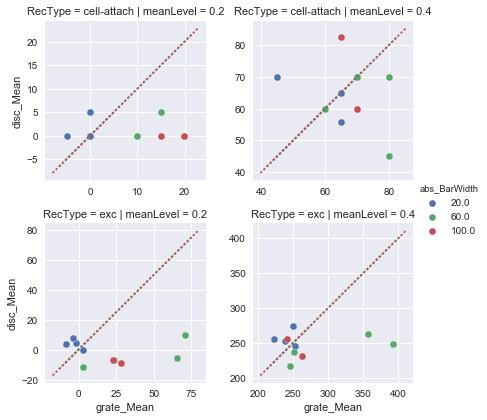

2017/01/12Cell
cell background includes:
[ 0.2]


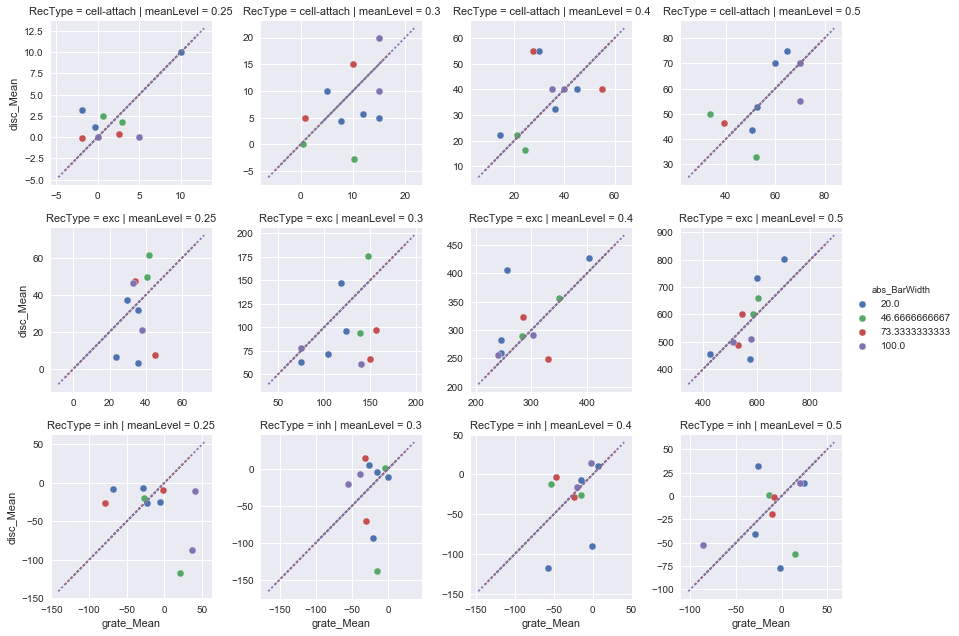

2017/02/07Cell1
cell background includes:
[ 0.3]


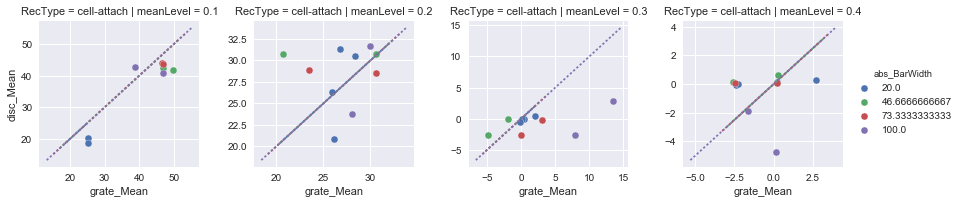

2017/02/07Cell2
cell background includes:
[ 0.3]


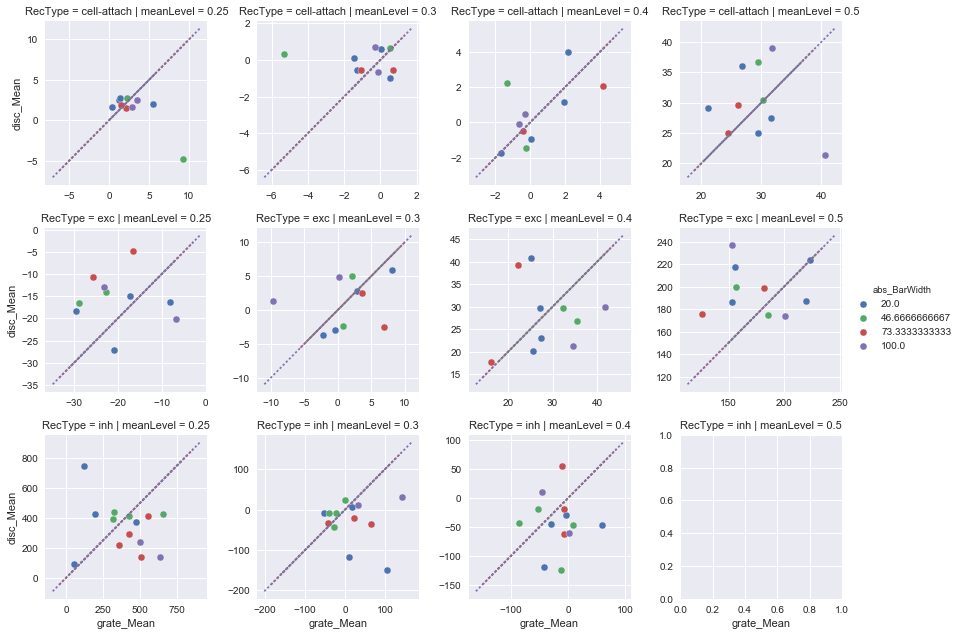

2017/03/22Cell1
cell background includes:
[ 0.3]


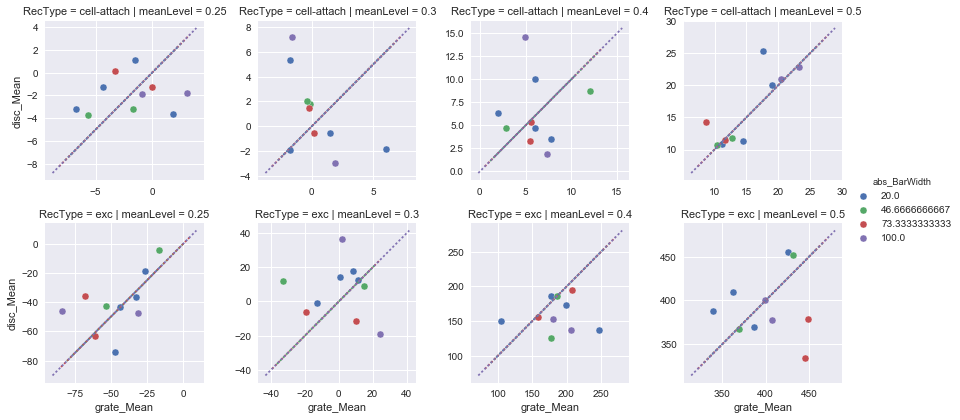

2017/03/22Cell2
cell background includes:
[ 0.3]


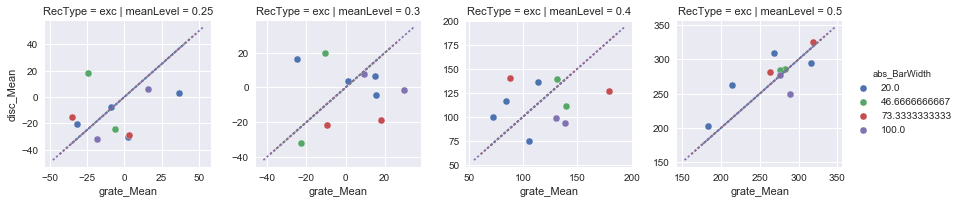

2017/03/29Cell
cell background includes:
[ 0.3]


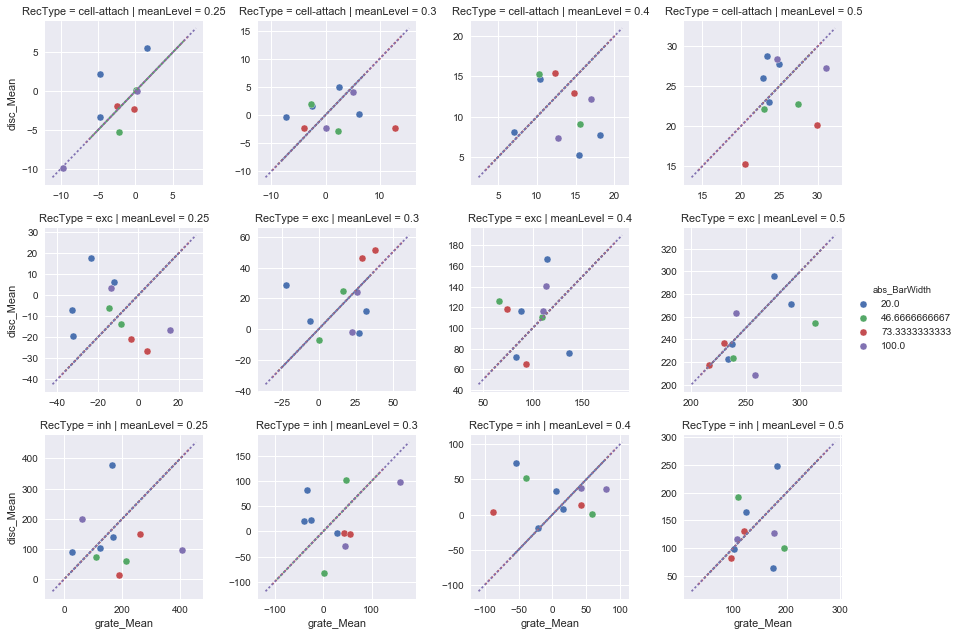

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
def plotdiag(x,y,**kwargs):
    plt.scatter(x, y, **kwargs)
    xmin,xmax = plt.xlim()
    ymin,ymax = plt.ylim()
    axmin, axmax = min(xmin,ymin),max(xmax,ymax)
    plt.plot([axmin, axmax],[axmin, axmax],linestyle = ':')
for cell in dataset.cell_id.unique():
    temp_df = dataset[dataset.cell_id == cell]
    print cell 
    print "cell background includes:"
    print temp_df.backgroundIntensity.unique()
    g = sns.FacetGrid(temp_df, row="RecType",col="meanLevel", hue = "abs_BarWidth",sharex=False, sharey=False)
    g = (g.map(plotdiag, "grate_Mean", "disc_Mean", edgecolor="w").add_legend())
    plt.show()